<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/%EA%B3%A0%EA%B0%9D_%EA%B5%AC%EB%A7%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"realspbabo","key":"84850eca11ef7983c622626ae833305f"}'}

In [2]:
ls -1ha kaggle.json


kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.65MB/s]


In [52]:
!ls

customer-segmentation-tutorial-in-python.zip  Mall_Customers.csv  sample_data


In [6]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


라이브러리 임포트 및 파일 불러오기 



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

df = pd.read_csv("Mall_Customers.csv")

df 를 확인하자

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


: 5개의 칼럼과 200개의 데이터가 있습니당   
누락데이터는 존재하지 않고 gender만 문자형 데이터입니다.

**소득과 구매력 열 이름이 너무 기므로 바꾸겠습니다 .**  


annual income(K$) -> income / Spending Score(1-100) -> purchase

In [17]:
df.rename(columns = {'Annual Income (k$)' : 'income', 	'Spending Score (1-100)' : 'purchase' }, inplace= True)

In [18]:
df.describe()

,CustomerID,Age,income,purchase,count
count,200.000000,200.000000,200.000000,200.000000,200.0
mean,100.500000,38.850000,60.560000,50.200000,1.0
std,57.879185,13.969007,26.264721,25.823522,0.0
min,1.000000,18.000000,15.000000,1.000000,1.0
25%,50.750000,28.750000,41.500000,34.750000,1.0
50%,100.500000,36.000000,61.500000,50.000000,1.0
75%,150.250000,49.000000,78.000000,73.000000,1.0
max,200.000000,70.000000,137.000000,99.000000,1.0


# EDA (시각화)

1.   구매자의 연령별, 성별 수입 분포 
2.   구매자의 연령별, 성별 구매력 분석  

matplot lib 한글깨짐 해결 


In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

구매자 Gender, age 데이터 분석

In [20]:
df['Gender'].value_counts()  

Female    112
Male       88
Name: Gender, dtype: int64

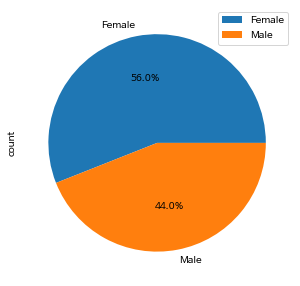

In [21]:
# 남녀 성비 분석 
df['count'] = 1
df_gender = df.groupby('Gender').sum()
df_gender['count'].plot(kind = 'pie', 
                        figsize= (5,5),
                        autopct = '%1.1f%%')
plt.legend(labels = df_gender.index, loc ='best')

In [28]:
# 연령 분포 확인 
df['Age'].describe()  # 18세 ~ 70세 

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

나이 데이터를 범주화하여 연령대 데이터(Ages)를 만들겠습니다.   
나이 데이터 분포는 18세 ~ 70세 입니다.   
39세 까지를 청년층 / 40세 ~ 59 세 : 중년층 /  60세 이상을 노년층으로 하겠습니다.

In [27]:
# 구간 분할 : 연령대
bin_dividers = [ 0, 40, 60, 70 ]
bin_names= [ '청년층', '중년층', '노년층']
df['Ages'] = pd.cut(x = df['Age'],
                    bins  = bin_dividers,
                    labels = bin_names,
                    include_lowest =True)
df['Ages'].value_counts()

청년층    122
중년층     61
노년층     17
Name: Ages, dtype: int64

연령대 별 소득 및 구매력을 보겠습니다 .

In [50]:
grouped= df.groupby('Ages')
gdf = grouped.mean()
gdf[['income', 'purchase']]

# 소득은 청년 - 중년 - 노년  / 구매력은 청년 - 노년 - 중년 순

,income,purchase
Ages,,
청년층,61.811475,59.295082
중년층,61.000000,33.688525
노년층,50.000000,44.176471


성별 소득 및 구매력을 보겠습니다 .

In [51]:
grouped= df.groupby('Gender')
gdf = grouped.mean()
gdf[['income', 'purchase']]

# 소득은 남성이 조금 더 높지만 구매력은 여성이 조금 더 높습니다.

,income,purchase
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


연령대와 성별을 기준으로 그룹화 하겠습니다.

In [26]:
grouped= df.groupby(['Ages' , 'Gender'])
gdf = grouped.mean()
gdf[['Age', 'income', 'purchase']]

Age     income   purchase
Ages Gender                                 
청년층  Female  29.623188  59.101449  60.695652
     Male    29.000000  65.339623  57.471698
중년층  Female  49.351351  60.486486  35.135135
     Male    51.250000  61.791667  31.458333
노년층  Female  66.166667  53.333333  47.166667
     Male    66.909091  48.181818  42.545455

이 결과를 시각화 화면 좋을 것 같습니다.

Text(0.5, 1.0, 'consumer purchase - Ages')

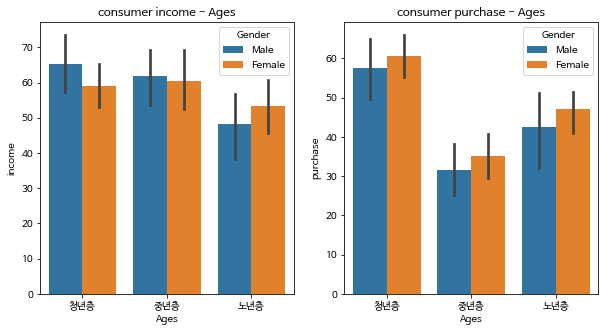

In [37]:
import seaborn as sns
# 연령대별 ,성별 평균 소득 및 구매력 비교 

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.barplot(data = df, x = 'Ages' , y = 'income' , hue = 'Gender' , ax = ax1)
sns.barplot(data = df, x = 'Ages' , y = 'purchase' , hue = 'Gender' , ax = ax2)

ax1.set_title('consumer income - Ages')
ax2.set_title('consumer purchase - Ages')

In [44]:
sns.boxplot?

Text(0.5, 1.0, 'consumer purchase dist - Ages')

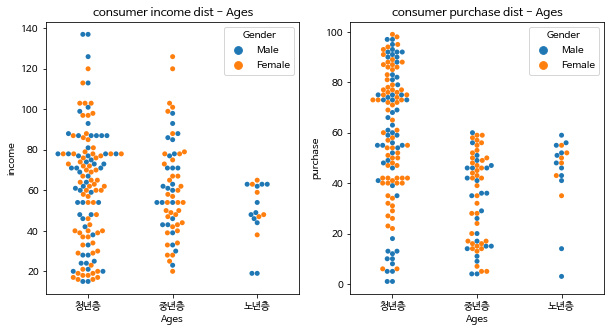

In [43]:
# 연령대별, 성별 소득 분포 
fig = plt.figure(figsize =(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 범주형 데이터 -> 분포 stripplot / swarmplot( 분산 )

sns.swarmplot(data = df , x = "Ages", y = "income", ax = ax1 , hue  ='Gender')
sns.swarmplot(data = df , x = "Ages", y = "purchase", ax = ax2 , hue  ='Gender')

ax1.set_title('consumer income dist - Ages')
ax2.set_title('consumer purchase dist - Ages')

# 소득과 구매력 사이에는 양의 상관관계가 뚜렷할까 ?   

-> 소득 , 구매력 연속변수 x , y 산점도 ( 회귀선도 보고싶음 ) -> regplot사용 

,income,purchase
income,1.000000,0.009903
purchase,0.009903,1.000000


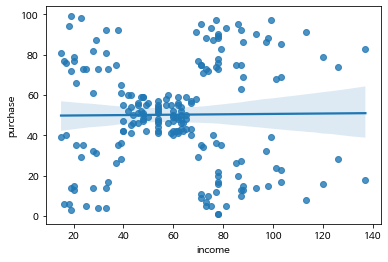

In [48]:
sns.regplot(data = df, 
            x = 'income', 
            y = 'purchase')
print('\n')
df[['income', 'purchase']].corr()

의외로 소득과 구매력 간 상관관계가 나타나지 않았다 .